該 import 的東西都差不多 import 完了，所以可以直接複製這個檔案作為開頭 section，直接開始後面的分析。

In [1]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.dates as mpl_dates
%matplotlib inline

import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 100

import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson as sdw
import statsmodels.stats.libqsturng
import plotly.express as px
from datetime import datetime

import stemgraphic as stem

# from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

# from mgt2001 import *

import mgt2001
from mgt2001.hyp.ind import two_population, two_population_proportion
import mgt2001.hyp.anova as anova
import mgt2001.hyp.chi2 as chi2
import mgt2001.hyp.non as non

import random
import itertools
import math

plt.style.use('ggplot') # refined style

mgt2001.__version__ # show version of mgt2001

'0.4.1.4'

## Data Processing

In [31]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

display(movie_df.head())
display(movie_df.tail())

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
0,4234,Scream 3,40000000,"['Horror', 'Mystery']",en,"['Craven-Maddalena Films', 'Dimension Films', ...",2000-02-03,NaN,161834276,116,...,R,37.0,驚聲尖叫3：終結篇,Scream Collection,0,1,1,0,2000,2
1,1907,The Beach,40000000,"['Drama', 'Adventure', 'Romance', 'Thriller']",en,['Figment Films'],2000-02-03,NaN,144056873,119,...,R,57.0,海灘,NaN,0,0,1,0,2000,2
2,15655,The Tigger Movie,30000000,"['Family', 'Animation', 'Comedy']",en,"['Disney Television Animation', 'DisneyToon St...",2000-02-11,NaN,45554533,77,...,G,62.0,跳跳虎歷險記,NaN,1,0,1,0,2000,2
3,14181,Boiler Room,7000000,"['Crime', 'Drama', 'Thriller']",en,['New Line Cinema'],2000-02-18,NaN,28780255,118,...,R,78.0,搶錢大作戰,NaN,0,0,1,0,2000,2
4,2069,The Whole Nine Yards,41300000,"['Comedy', 'Crime']",en,"['Franchise Pictures', 'Morgan Creek Productio...",2000-02-18,NaN,106371651,98,...,R,64.0,殺手不眨眼,The Whole Nine/Ten Yards Collection,0,1,1,0,2000,2


,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3167,460465,Mortal Kombat,20000000,"['Action', 'Fantasy', 'Adventure']",en,"['Atomic Monster', 'Broken Road Productions', ...",2021-04-07,NaN,76706000,110,...,R,86.0,真人快打,NaN,1,0,0,1,2021,4
3168,637649,Wrath of Man,40000000,"['Action', 'Crime']",en,"['Miramax', 'Metro-Goldwyn-Mayer', 'Toff Guy F...",2021-04-22,2021-04-29T00:00:00.000Z,80648577,119,...,R,91.0,玩命鈔劫,NaN,1,0,0,1,2021,4
3169,520663,The Woman in the Window,4000000,"['Crime', 'Mystery', 'Thriller']",en,"['Fox 2000 Pictures', 'Scott Rudin Productions...",2021-05-14,NaN,0,102,...,R,36.0,窺探,NaN,1,0,0,1,2021,5
3170,503736,Army of the Dead,90000000,"['Action', 'Horror', 'Thriller']",en,['The Stone Quarry'],2021-05-14,NaN,780000,148,...,NaN,NaN,活屍大軍,Army of the Dead Collection,1,1,0,1,2021,5
3171,337404,Cruella,200000000,"['Comedy', 'Crime']",en,['Walt Disney Pictures'],2021-05-26,NaN,46586903,134,...,PG-13,97.0,時尚惡女：庫伊拉,Cruella Collection,1,1,0,1,2021,5


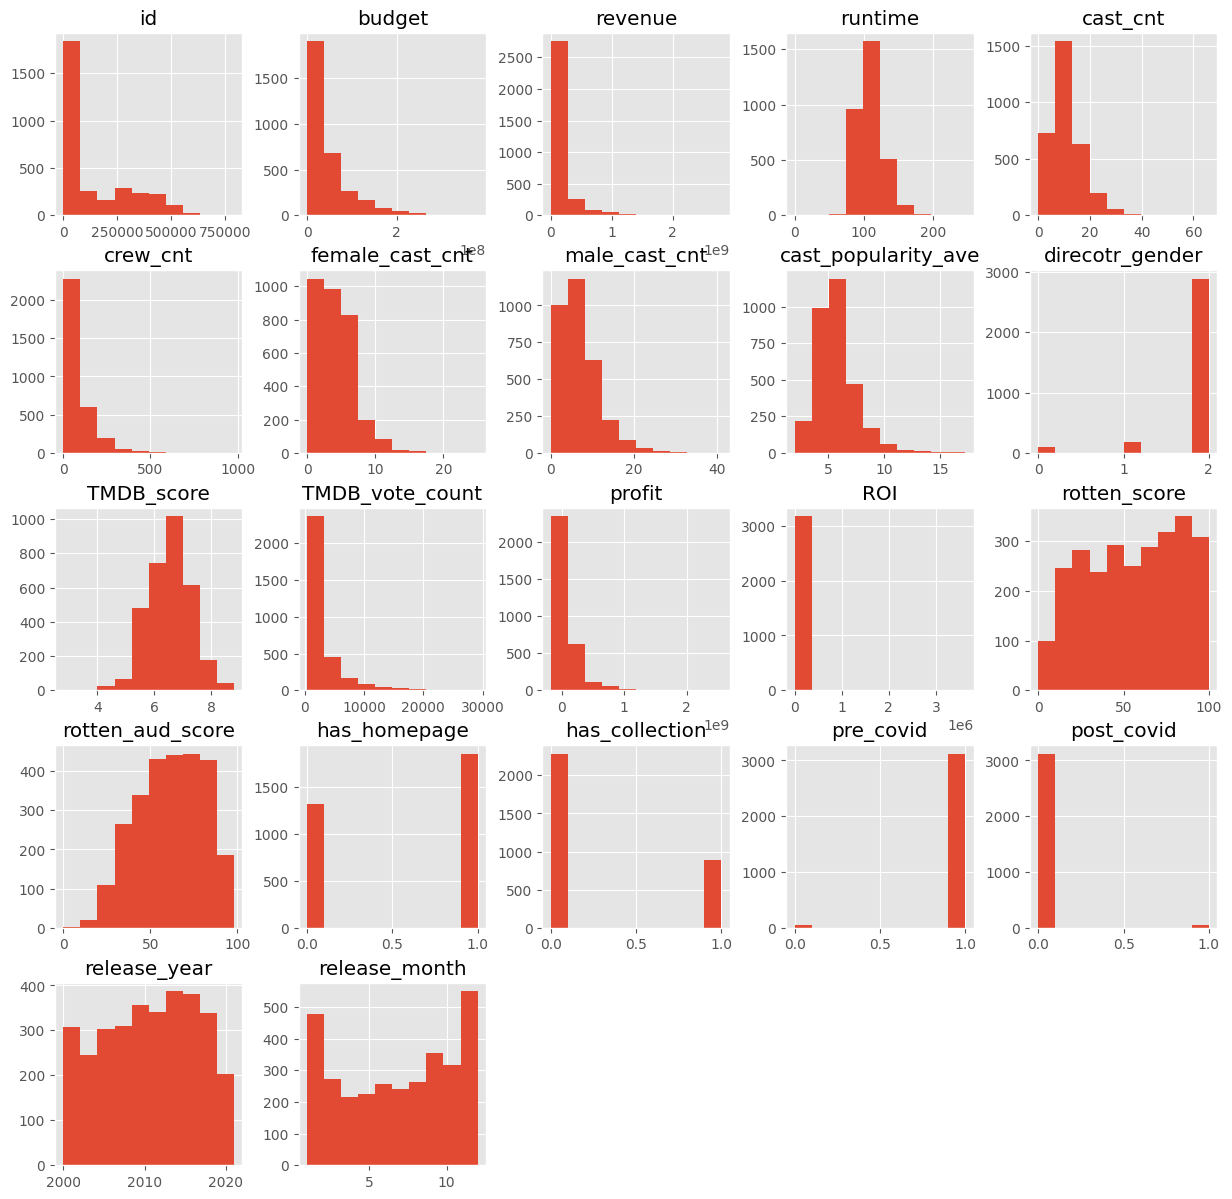

In [32]:
movie_df.hist(figsize=(15, 15))
plt.show()

可以看出裡面有需多 outliers，這些 data points 很可能影響到整體結果，所以我們將不考慮這些電影的計算。

在這邊，我們也可以看到 "revenue"、"budget"、"ROI" 這三個重點項目都不是常態分佈，要做分析的話會有點困難。這時候，我們可以採用 `np.log1p()` 來做 data transformation。如要要做預測的話，則是用 `np.exp1p()` 來還原。這部分，會在去除玩異質之後統一處理。

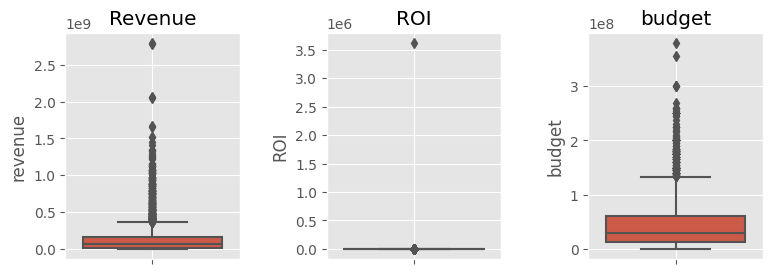

In [53]:
# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

<div class="alert alert-block alert-info">
<b>你知道嗎？</b> 票房最高的電影是 2019 年上映的復仇者聯盟：終局之戰。</div>

In [41]:
movie_df[movie_df['revenue'] == movie_df['revenue'].max()]

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3005,299534,Avengers: Endgame,356000000,"['Adventure', 'Science Fiction', 'Action']",en,['Marvel Studios'],2019-04-24,2019-04-24T00:00:00.000Z,2797800564,181,...,PG-13,90.0,復仇者聯盟：終局之戰,The Avengers Collection,1,1,1,0,2019,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2248 non-null   int64         
 1   title                  2248 non-null   object        
 2   budget                 2248 non-null   int64         
 3   genres                 2248 non-null   object        
 4   original_language      2248 non-null   object        
 5   production_companies   2248 non-null   object        
 6   release_date           2248 non-null   datetime64[ns]
 7   TW_release_date        500 non-null    object        
 8   revenue                2248 non-null   int64         
 9   runtime                2248 non-null   int64         
 10  cast                   2248 non-null   object        
 11  cast_cnt               2248 non-null   int64         
 12  crew_cnt               2248 non-null   int64         
 13  fem

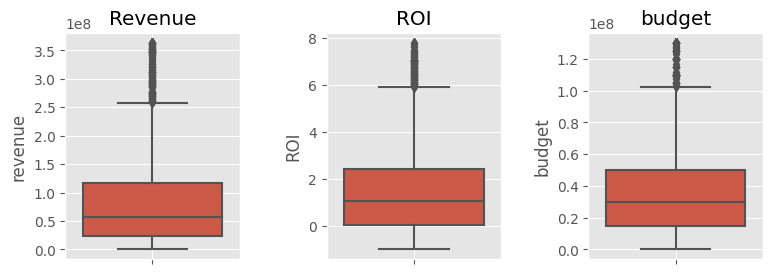

(2248, 33)


In [76]:
rev_outlier = mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0]
roi_outlier = mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0]
budget_outlier = mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

這明顯已經較上面所看到的 box plots 好上許多。因此我們便用剩下的 2248 筆資料進行更近一步的分析。另外，在這邊也要注意到，不是所有的 column 都是 2248 筆資料，有些 data 是有少的。所以在做分析時要格外小心。

In [77]:
u_movie_df['log_revenue'] = np.log1p(u_movie_df['revenue'])
u_movie_df['log_budget'] = np.log1p(u_movie_df['budget'])
u_movie_df['log_ROI'] = np.log1p(u_movie_df['ROI'])

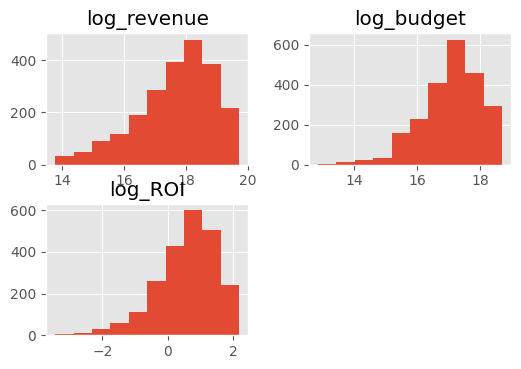

In [78]:
u_movie_df[['log_revenue', 'log_budget', 'log_ROI']].hist()
plt.show()

## Data Analysis